## Práctica 7: Red Neuronal Multiclase. Evaluacion detallada 

Grupo 5: Jorge Ortega y Daniela Vidal

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [54]:
def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0],[1, 0],[0, 1],[0, -1],[-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std) 

In [55]:
X, y, centers, classes, std = gen_blobs()
X.shape

(800, 2)

Separamos en un 60% de los datos para entrenamiento, 20% para validación y 20% para test.

In [56]:
X_train, X, y_train, y = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

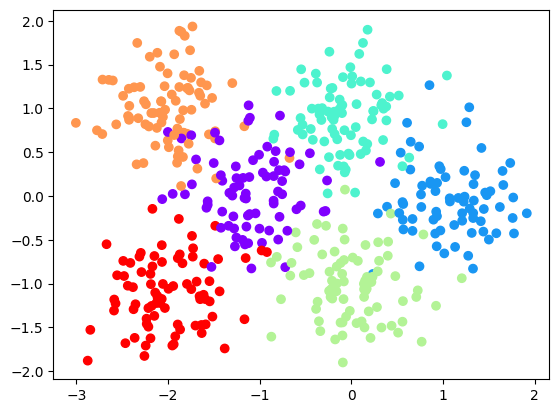

In [57]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='rainbow')

Tenemos datos que tienen un valor X y un valor Y que se asignan a una de 6 posibles clusters (del 0 al 5). El objetivo es predecir el cluster al que pertenece un punto. Por tanto es un problema de clasificación multiclase.

In [82]:
iters = 1000

# 1. Modelo complejo con muchas neuronas

Vamos a hacer un primer modelo con muchas neuronas para ver si es capaz de aprender los datos.
Tendrá 3 capas ocultas, la primera con 150 neuronas, la segunda con 50 y la última con 6, una por cada clase.

In [59]:
complex_model = Sequential(
    [Dense(units = 150,activation = 'relu'), 
     Dense(units = 50,activation = 'relu'), 
     Dense(units = 6,activation = 'linear')]
)

Las capas ocultas las hacemos con ReLu ya que este es el óptimo para este tipo de problemas. En la última neurona, al ser un problema de multi clasificación, usamos lineal con adam ya que es la combinación con la que mejor resultados obtuvimos en la práctica 6.

In [60]:
complex_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),)

complex_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 0s 12ms/step - loss: 1.6409 - val_loss: 1.4891
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.3756 - val_loss: 1.2443
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.1311 - val_loss: 1.0141
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9075 - val_loss: 0.8114
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7252 - val_loss: 0.6477
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5808 - val_loss: 0.5245
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4799 - val_loss: 0.4365
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4184 - val_loss: 0.3897
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.3802 - val_loss: 0.3614
Epoch 10/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.3485 - val_loss: 0.333

Precisión para los datos de entrenamiento:

In [61]:
c_m_f = tf.nn.softmax(complex_model(X_train), axis=1)
c_m_pred = tf.argmax(c_m_f, axis=1)

In [62]:
print("Accuracy complex model: ", np.sum(c_m_pred == y_train)/len(y_train))

Accuracy complex model:  0.9541666666666667


Precisión para los datos de test:

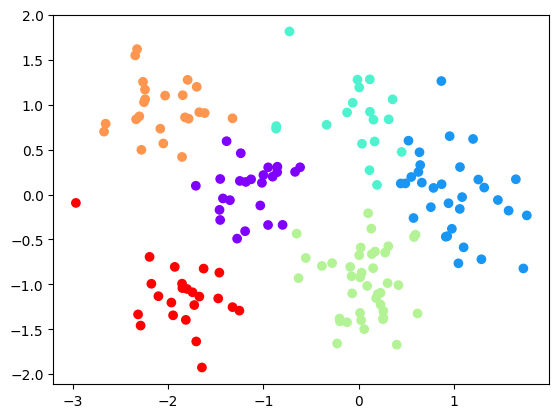

In [63]:
c_m_f = tf.nn.softmax(complex_model(X_test), axis=1)
c_m_pred = tf.argmax(c_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=c_m_pred, cmap='rainbow')

In [64]:
print("Accuracy complex model: ", np.sum(c_m_pred == y_test)/len(y_test))

Accuracy complex model:  0.9


# 2. Modelo simple con pocas neuronas

Vamos a hacer un primer modelo con pocas neuronas.
Tendrá 3 capas ocultas, la primera con 9 neuronas, la segunda con 7 y la última con 6, una por cada clase.

In [83]:
simple_model = Sequential(
    [Dense(units = 8,activation = 'relu'), 
     Dense(units = 7,activation = 'relu'), 
     Dense(units = 6,activation = 'linear')]
)

Dejaremos el resto de parámetros igual que en el modelo anterior para que la comparación de ambos sea únicamente por simple/complejo.

In [84]:
simple_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),)

simple_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 1.6177 - val_loss: 1.5644
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.5816 - val_loss: 1.5283
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 1.5500 - val_loss: 1.4945
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.5191 - val_loss: 1.4636
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.4905 - val_loss: 1.4315
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.4610 - val_loss: 1.3994
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.4310 - val_loss: 1.3674
Epoch 8/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.4018 - val_loss: 1.3337
Epoch 9/1000
15/15 [==============================] - 0s 7ms/step - loss: 1.3709 - val_loss: 1.3016
Epoch 10/1000
15/15 [==============================] - 0s 8ms/step - loss: 1.3408 - val_loss: 1.269

Precisión para los datos de entrenamiento:

In [85]:
s_m_f = tf.nn.softmax(simple_model(X_train), axis=1)
s_m_pred = tf.argmax(s_m_f, axis=1)

In [86]:
print("Accuracy simple model: ", np.sum(s_m_pred == y_train)/len(y_train))

Accuracy simple model:  0.9229166666666667


Precisión para los datos de test:

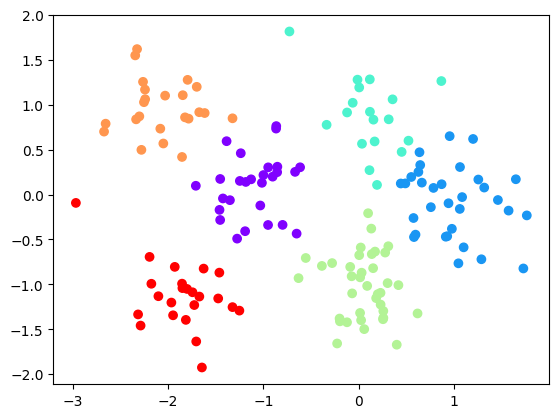

In [87]:
s_m_f = tf.nn.softmax(simple_model(X_test), axis=1)
s_m_pred = tf.argmax(s_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=s_m_pred, cmap='rainbow')

In [88]:
print("Accuracy simple model: ", np.sum(s_m_pred == y_test)/len(y_test))

Accuracy simple model:  0.93125


# 3. Modelo complejo con regularización

Usaremos los mismos parámetros que en la compleja pero con regularización.

### 3.1 Primero averiguaremos el mejor valor para el parámetro de regularización

In [71]:
def parameter_decision(X_train, y_train, X_val, y_val, X_test, y_test):
    acc = list()
    lambdas = [0.001, 0.01, 0.1, 1]
    for l in lambdas:
        reg_model = Sequential(
            [Dense(units = 150,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l)),
            Dense(units = 50,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l)),
            Dense(units = 6,activation = 'linear')]
        )
        reg_model.compile(
            loss = SparseCategoricalCrossentropy(from_logits=True),
            optimizer = Adam(learning_rate=1e-3),)
        
        reg_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

        r_m_f = tf.nn.softmax(reg_model(X_test), axis=1)
        r_m_pred = tf.argmax(r_m_f, axis=1)
        aux = np.sum(r_m_pred == y_test)/len(y_test)
        acc.append(aux)
    return acc, lambdas

In [72]:
acc, lambdas = parameter_decision(X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/1000
15/15 [==============================] - 3s 33ms/step - loss: 1.6907 - val_loss: 1.5111
Epoch 2/1000
15/15 [==============================] - 0s 16ms/step - loss: 1.3813 - val_loss: 1.2337
Epoch 3/1000
15/15 [==============================] - 0s 12ms/step - loss: 1.1213 - val_loss: 0.9851
Epoch 4/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.8917 - val_loss: 0.7736
Epoch 5/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.7090 - val_loss: 0.6291
Epoch 6/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.5914 - val_loss: 0.5432
Epoch 7/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.5244 - val_loss: 0.4922
Epoch 8/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.4818 - val_loss: 0.4642
Epoch 9/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.4597 - val_loss: 0.4434
Epoch 10/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.4356 - val_los

Visualizamos los datos

[0.93125, 0.93125, 0.93125, 0.15625]

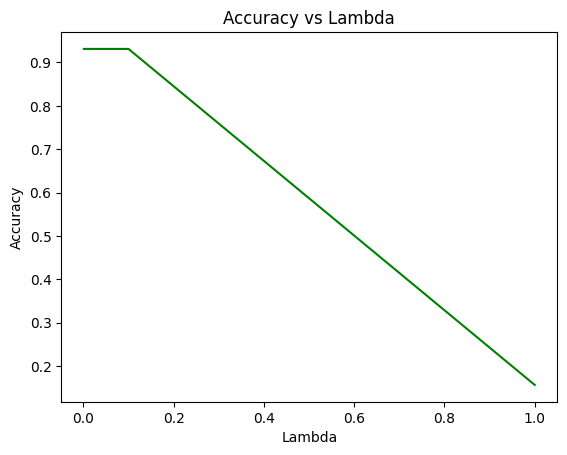

In [73]:
plt.plot(lambdas, acc, color="green")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
acc

In [74]:
best_lambda = lambdas[np.argmax(acc)]
best_lambda

0.001

Aqui se puede observar el mejor valor para el parámetro de regularización.

In [75]:
reg_model = Sequential(
    [Dense(units = 150,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(best_lambda)),
    Dense(units = 50,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(best_lambda)),
    Dense(units = 6,activation = 'linear')]
)

In [76]:
reg_model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=1e-3),)

reg_model.fit(X_train, y_train, epochs=iters, validation_data=(X_val, y_val))

Epoch 1/1000
15/15 [==============================] - 0s 12ms/step - loss: 1.7241 - val_loss: 1.5340
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.4252 - val_loss: 1.2744
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 1.1693 - val_loss: 1.0246
Epoch 4/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.9339 - val_loss: 0.8055
Epoch 5/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.7444 - val_loss: 0.6516
Epoch 6/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6194 - val_loss: 0.5647
Epoch 7/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.5437 - val_loss: 0.5051
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4974 - val_loss: 0.4748
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4635 - val_loss: 0.4497
Epoch 10/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4451 - val_loss: 0.430

Precisión para los datos de entrenamiento:

In [77]:
r_m_f = tf.nn.softmax(reg_model(X_train), axis=1)
r_m_pred = tf.argmax(r_m_f, axis=1)

In [78]:
print("Accuracy regularized model: ", np.sum(r_m_pred == y_train)/len(y_train))

Accuracy regularized model:  0.925


Precisión para los datos de test:

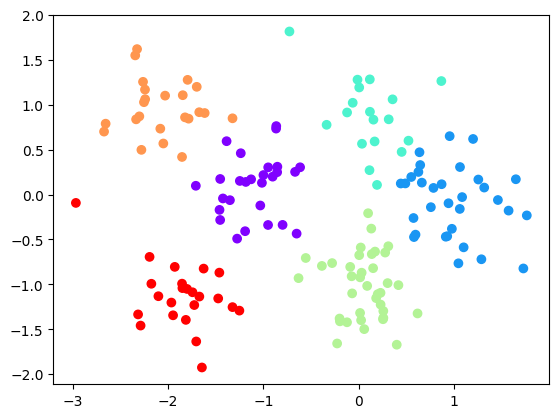

In [79]:
r_m_f = tf.nn.softmax(reg_model(X_test), axis=1)
r_m_pred = tf.argmax(r_m_f, axis=1)

plt.scatter(X_test[:,0], X_test[:,1], c=r_m_pred, cmap='rainbow')

In [80]:
print("Accuracy regularized model: ", np.sum(r_m_pred == y_test)/len(y_test))

Accuracy regularized model:  0.93125


# 4. Pintamos las curvas de aprendizaje

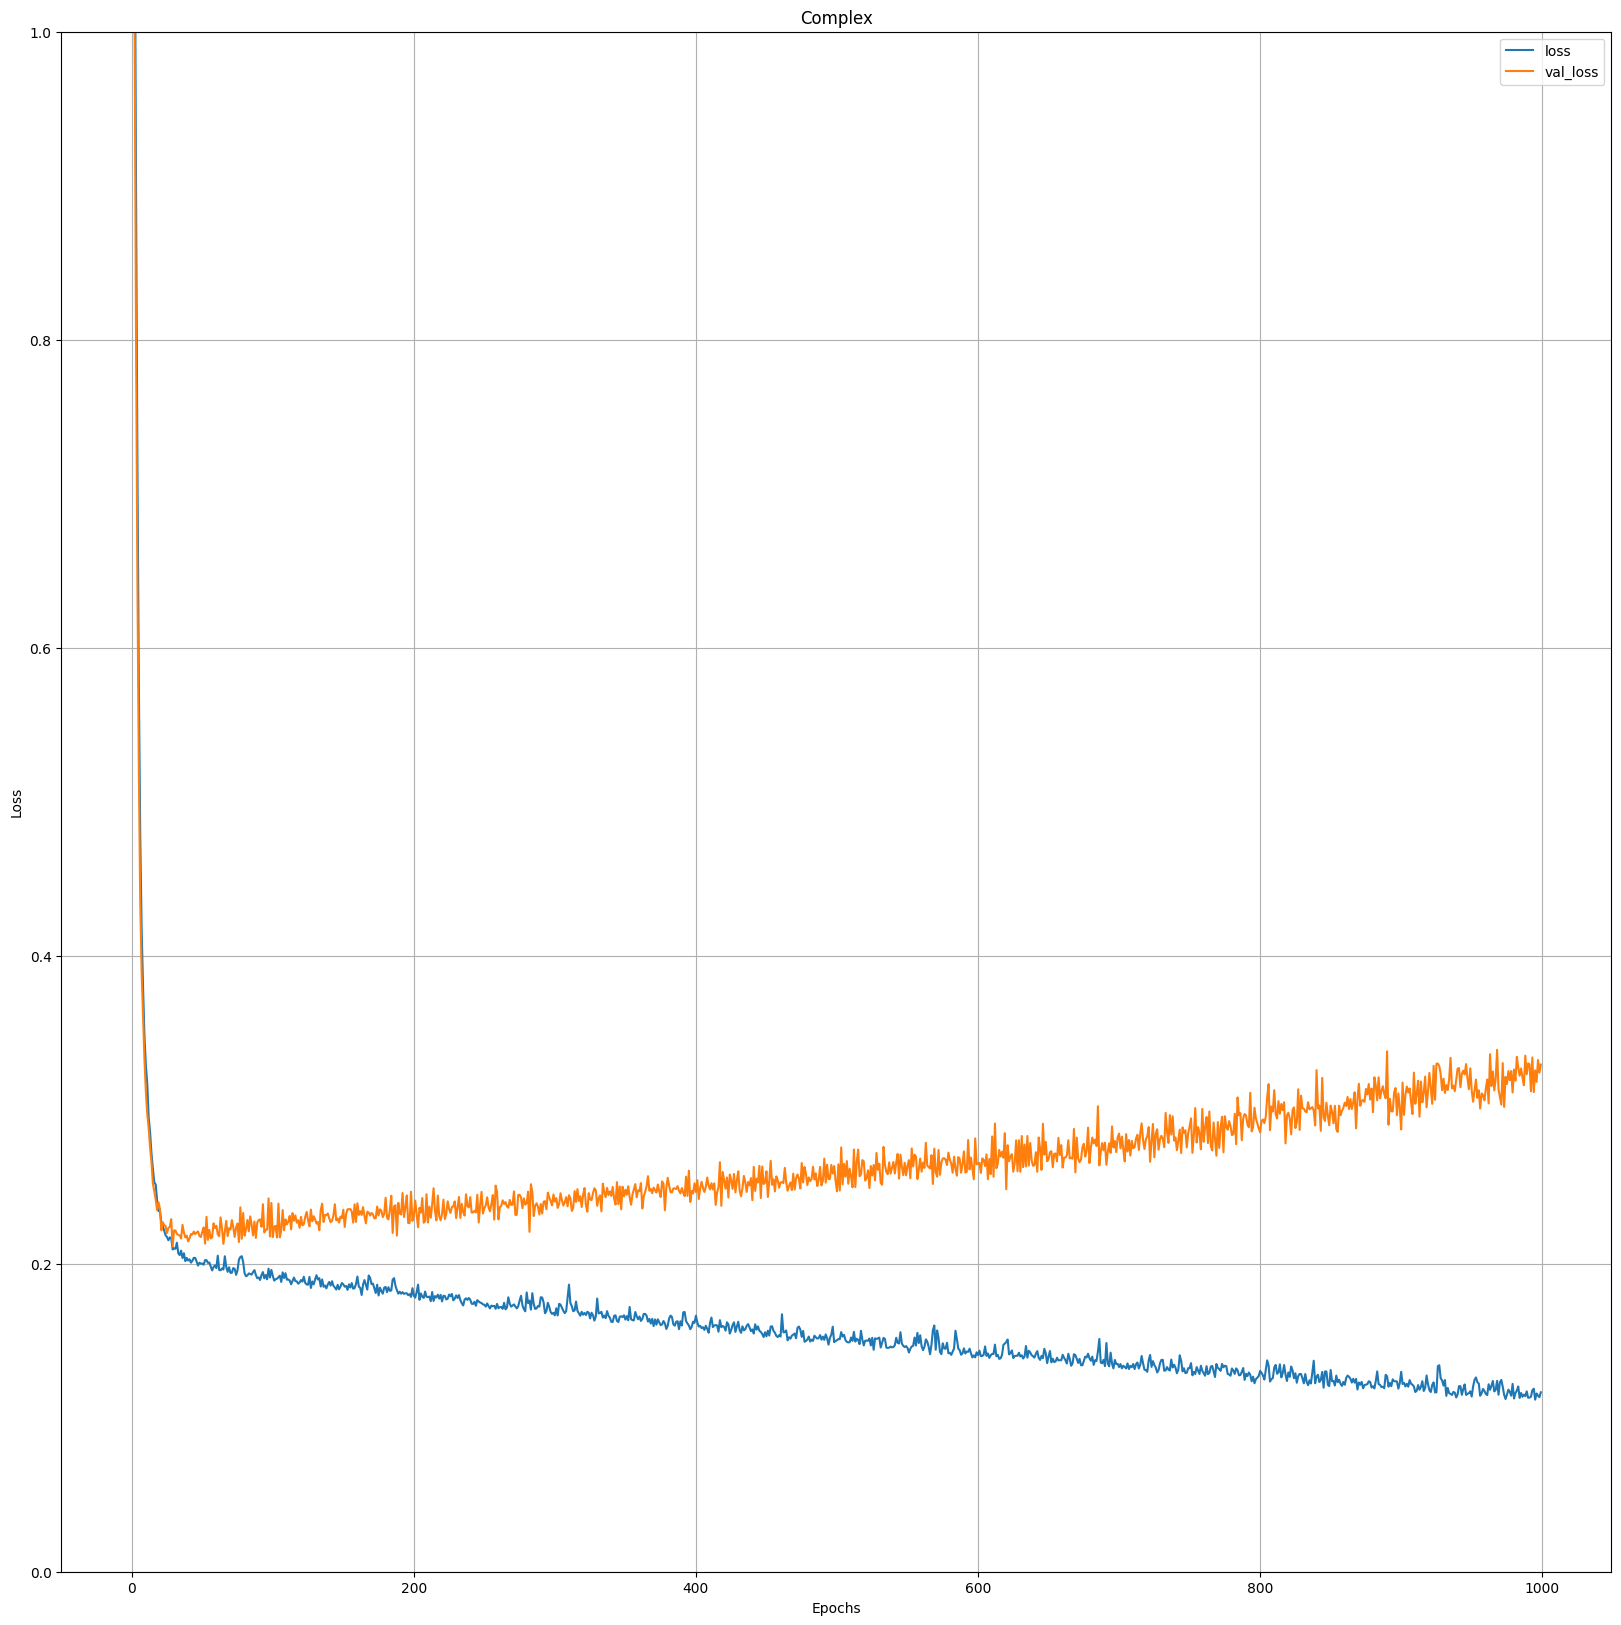

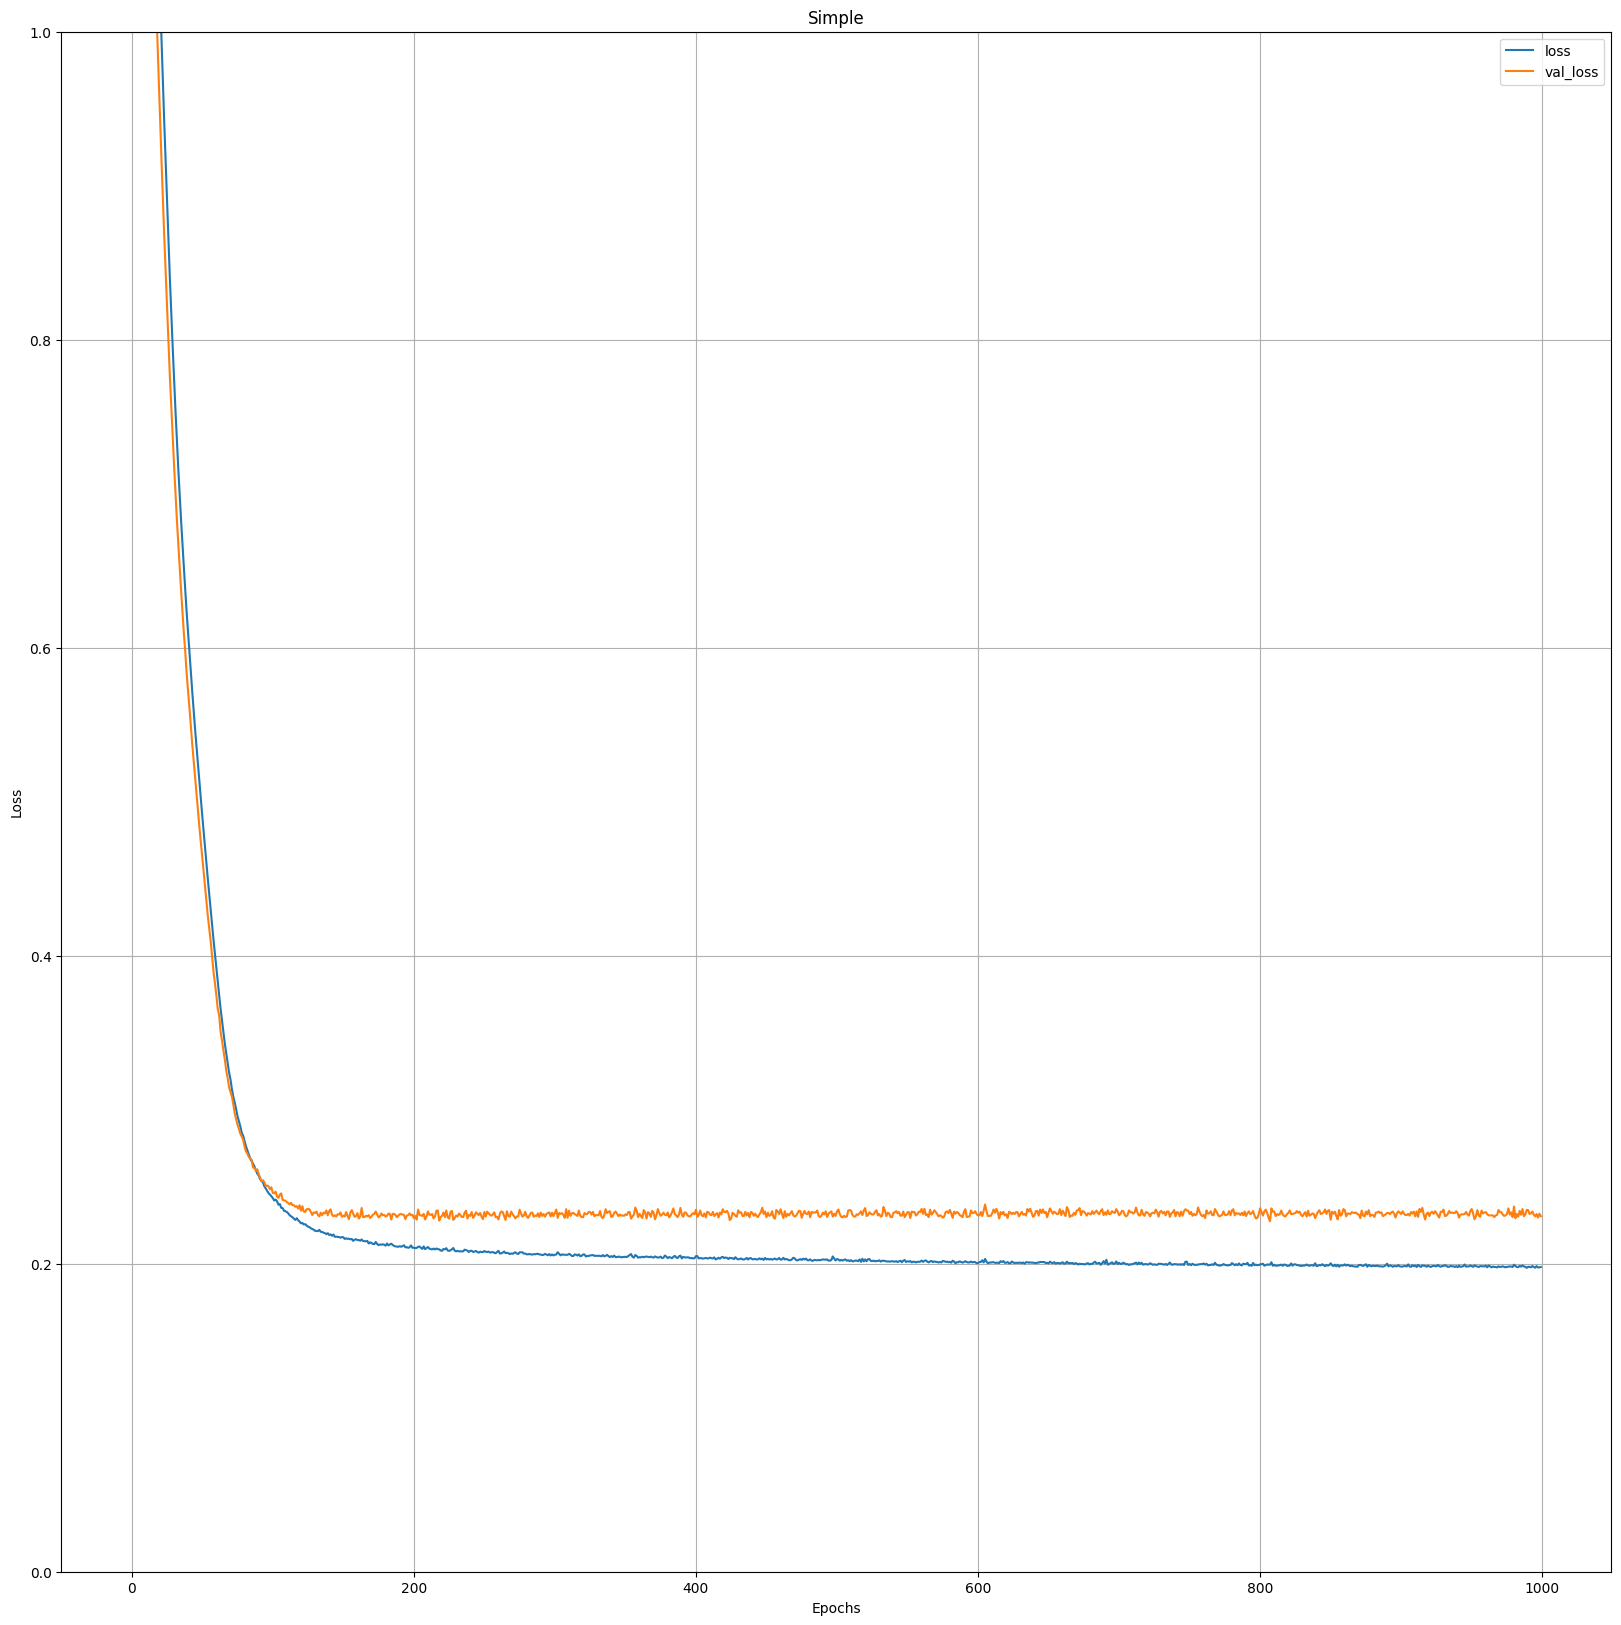

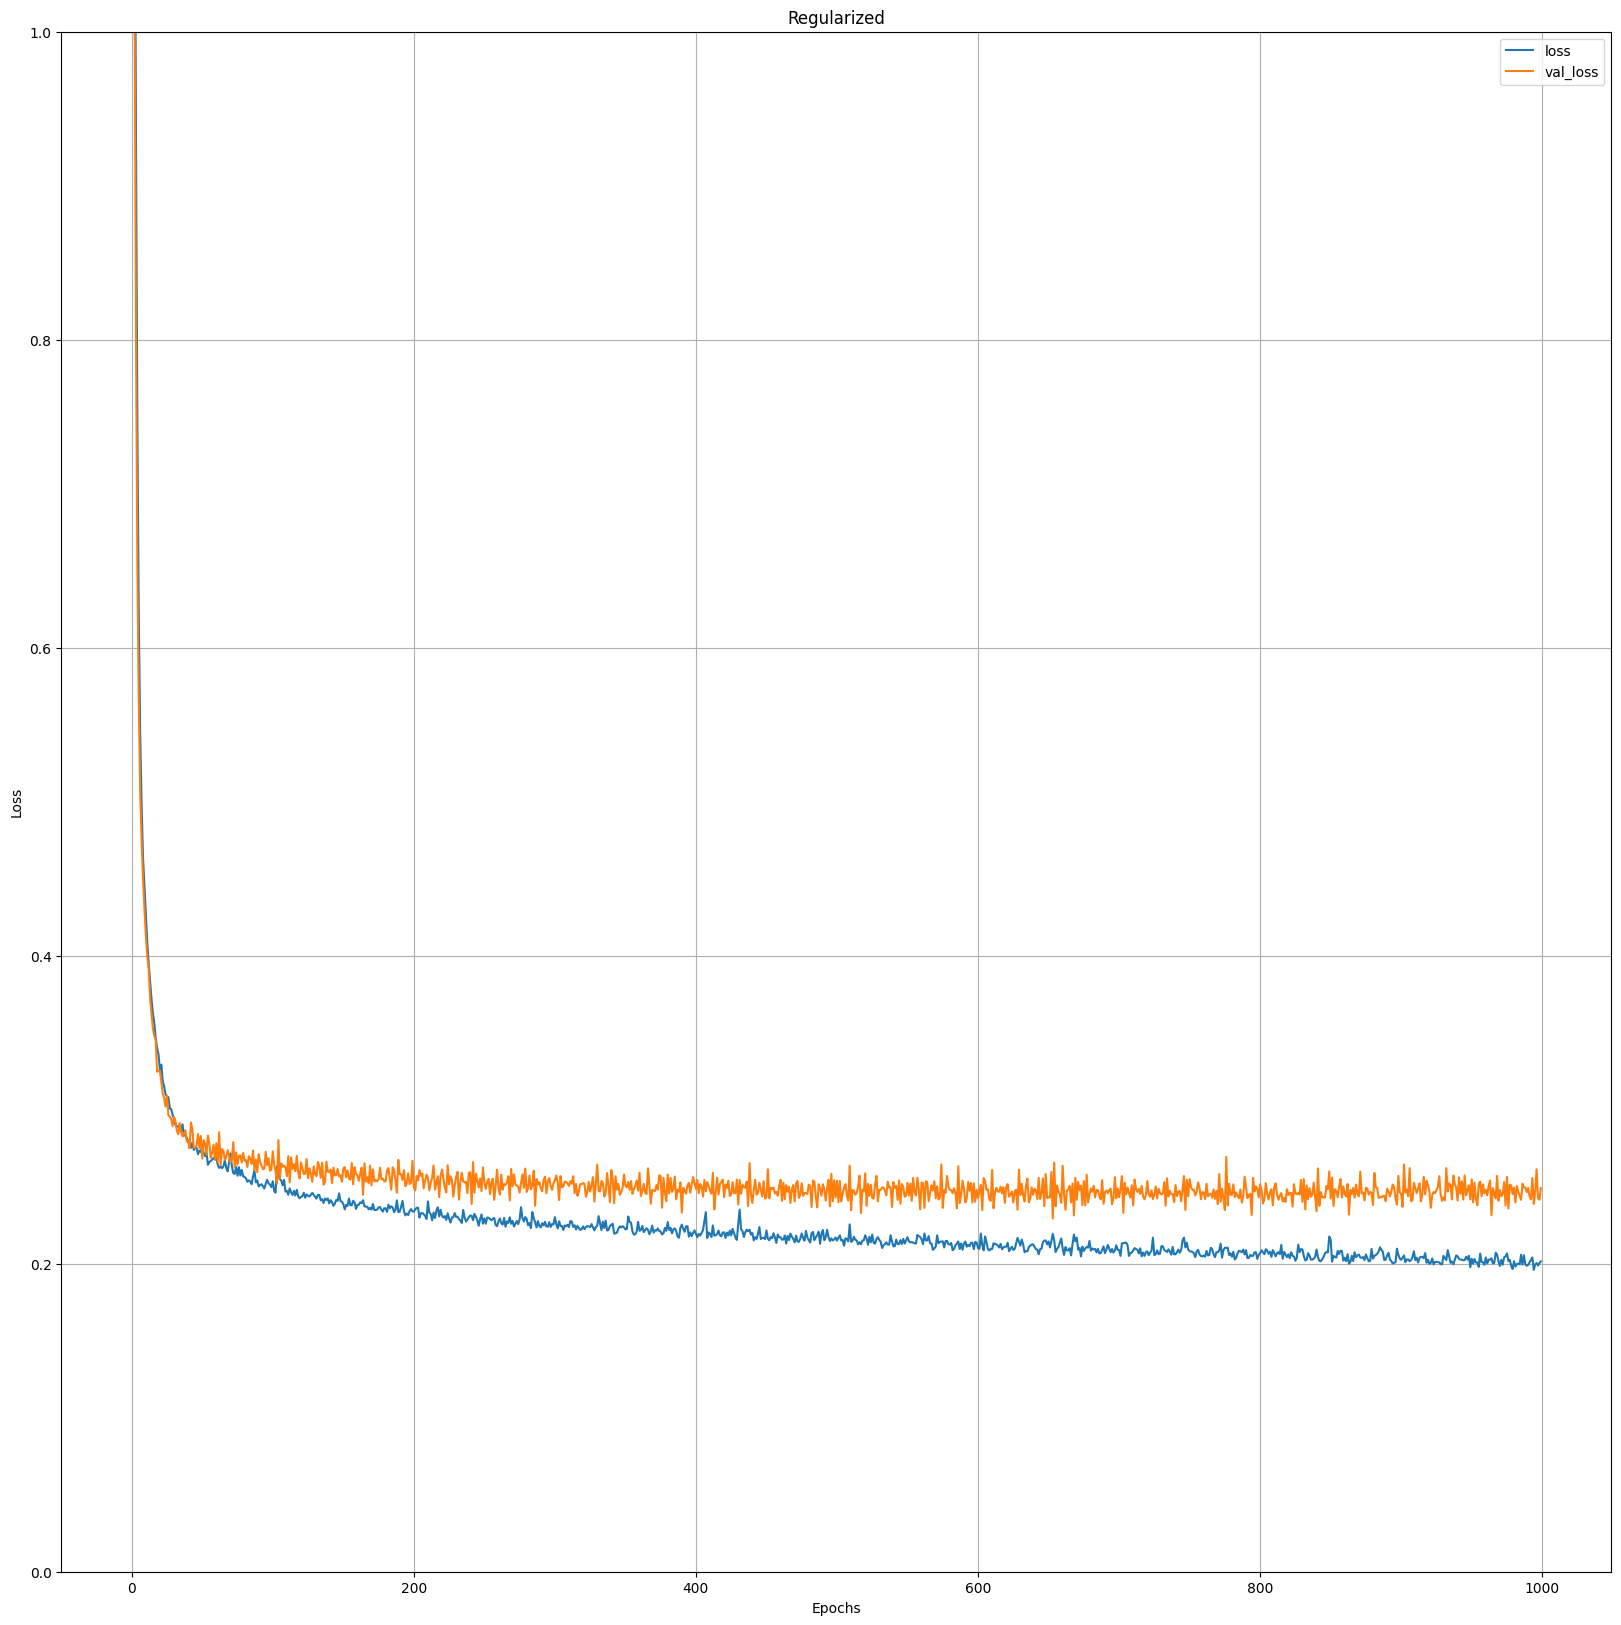

In [89]:
import pandas as pd

def plot_learning_curves(history, title):
    pd.DataFrame(history.history).plot(figsize=(20,20))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()

plot_learning_curves(complex_model.history, "Complex")
plot_learning_curves(simple_model.history, "Simple")
plot_learning_curves(reg_model.history, "Regularized")

De estas gráficas podemos observar que:

Para el modelo complejo a partir de 25 iteraciones el error de validación empieza a subir drásticamente, por lo que es un buen momento para parar el entrenamiento, con lo que si se elige más de 25 se produce overfitting.

Para el modelo simple a partir de 100 aproximadamente, el error de validación empieza a subir y la pérdida se estabiliza, por lo que estas serían las iteraciones justas.

Para el modelo regularizado a partir de la iteración 25 aproximadamente, el error de validación empieza a subir con lo que ese es el número de iteraciones óptimo para que no se produzca overfitting.	


# 5. CONCLUSIONES

Se puede ver que en el complejo con 1000 iteraciones se obtiene un 95% de precisión en el conjunto de entrenamiento y un 90% en el de test, por lo que se puede decir que hay overfitting, esto es esperaable ya que el modelo es muy complejo para los datos.

En el modelo simple con 1000 iteraciones se obtiene un 92% de precisión en el conjunto de entrenamiento y un 93% en el de test, por lo que se puede decir que no hay overfitting, esto son bastante buenos resultados ya que se trata de un modelo demasiado simple para estos datos.

En el modelo regularizado con 1000 iteraciones se obtiene un 92% de precisión en el conjunto de entrenamiento y un 93% en el de test, por lo que se puede decir que no hay overfitting, ademas se puede observar que el error de validación es menor que en el modelo simple, por lo que se puede decir que el modelo regularizado es mejor que el modelo simple.